# WRF / SCI Air Fog Comparison
__Author:__ Pat McCornack

__Date:__ 11-22-24

__Description:__  
This notebook compares WRF model outputs with observational data collected at the Sauces Canyon (SAUC) and Upper Embudo Canyon (UPEM) by weather stations installed by Chris Still, as well the NRS SCI weather station.

__Findings Summary:__

__Credits:__  
This is a modified version of cis.1.airt.compare.ipynb written by Charles Jones. 

In [1]:
import os 
import glob 

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from   matplotlib.lines import Line2D
import seaborn as sns

# Functions

In [2]:
# Compare summer fog data
def plot_summer_comp(wrf_df, obs_df, daterange, site):
    ## Create subsets of data
    year = daterange[0].split('-')[0]
    wrf_df = wrf_df[daterange[0]:daterange[1]]
    obs_df = obs_df[daterange[0]:daterange[1]]
    
    bar_width = 0.05

    ## Make Plots
    fig, ax = plt.subplots(2, 1, figsize=(20, 6))
    ax[0].bar(wrf_df.index, wrf_df['DFGDP'], label='Fog', width=bar_width)
    wrh_ax = ax[0].twinx()
    wrh_ax.plot(wrf_df.index, wrf_df['RH'], color='green', alpha=0.5, label='RH')
    
    ax[1].bar(obs_df.index, obs_df['fog drip'], color='red', label='Fog', width=bar_width)
    orh_ax = ax[1].twinx()
    orh_ax.plot(obs_df.index, obs_df['relative humidity (%)'], color='orange', alpha=0.5, label='RH')

    
    ax[0].set(title=f'{site} WRF {year}')
    ax[1].set(title=f'{site} Observational {year}')

    plt.tight_layout()
    plt.show()
    


# Read Data

In [3]:
#### Read in WRF data ####
wdatadir = '/home/patmccornack/data/wrf_extracted'
w_sauc_fgdp_fname = '_archive/wrf_sauc_FGDP_2003-2010.pkl'
w_upem_fgdp_fname = '_archive/wrf_upem_FGDP_2003-2010.pkl'
w_sauc_fname = 'wrf_sauc_2003-2010.pkl'
w_upem_fname = 'wrf_upem_2003-2010.pkl'

sauc_fgdp = pd.read_pickle(os.path.join(wdatadir, w_sauc_fgdp_fname))
upem_fgdp = pd.read_pickle(os.path.join(wdatadir, w_upem_fgdp_fname))
wsauc = pd.read_pickle(os.path.join(wdatadir, w_sauc_fname))
wupem = pd.read_pickle(os.path.join(wdatadir, w_upem_fname))

# Convert UTC TO PST
sauc_fgdp.index = sauc_fgdp.index - pd.Timedelta(hours=8)
sauc_fgdp.index = sauc_fgdp.index - pd.Timedelta(hours=8)
wsauc.index = wsauc.index - pd.Timedelta(hours=8)
wupem.index = wupem.index - pd.Timedelta(hours=8)


In [5]:
#### Read in observational data #####
odatadir = '/home/patmccornack/data/preprocessed'
osauc_fname = 'SAUC_hourly.csv'
oupem_fname = 'UPEM_hourly.csv'

osauc = pd.read_csv(os.path.join(odatadir, osauc_fname), index_col='time (PST)')
oupem = pd.read_csv(os.path.join(odatadir, oupem_fname), index_col='time (PST)')
osauc.index = pd.to_datetime(osauc.index)
oupem.index = pd.to_datetime(oupem.index)

# Check Data

## Compare FGDP with DFGDP
Based on talks with Charles Jones, who ran the WRF model, we were uncertain what exactly FGDP vs. DFGDP were representing. Based on this, it appears that FGDP is cumulative fog deposition for each fog event. It resets to 0 when no fog is recorded for a certain period. DFGDP is fog deposition for each time step, which is the value we're interested in. 

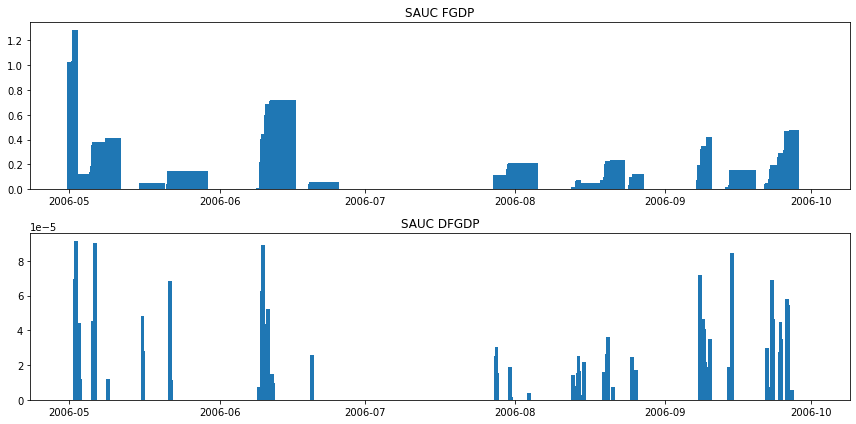

In [6]:
#### Compare SAUC FGDP and DFGDP #### 
## Create subsets of data
time_subset = ['2006-05-01', '2006-09-30']
sauc_sub = wsauc[time_subset[0]:time_subset[1]]
sauc_fgdp_sub = sauc_fgdp[time_subset[0]:time_subset[1]]

## Make Plots
fig, ax = plt.subplots(2, 1, figsize=(12, 6))
ax[0].bar(sauc_fgdp_sub.index, sauc_fgdp_sub['FGDP'])
ax[1].bar(sauc_sub.index, sauc_sub['DFGDP'])

ax[0].set(title='SAUC FGDP')
ax[1].set(title='SAUC DFGDP')

plt.tight_layout()
plt.show()

## Compare WRF data with Observational Plots

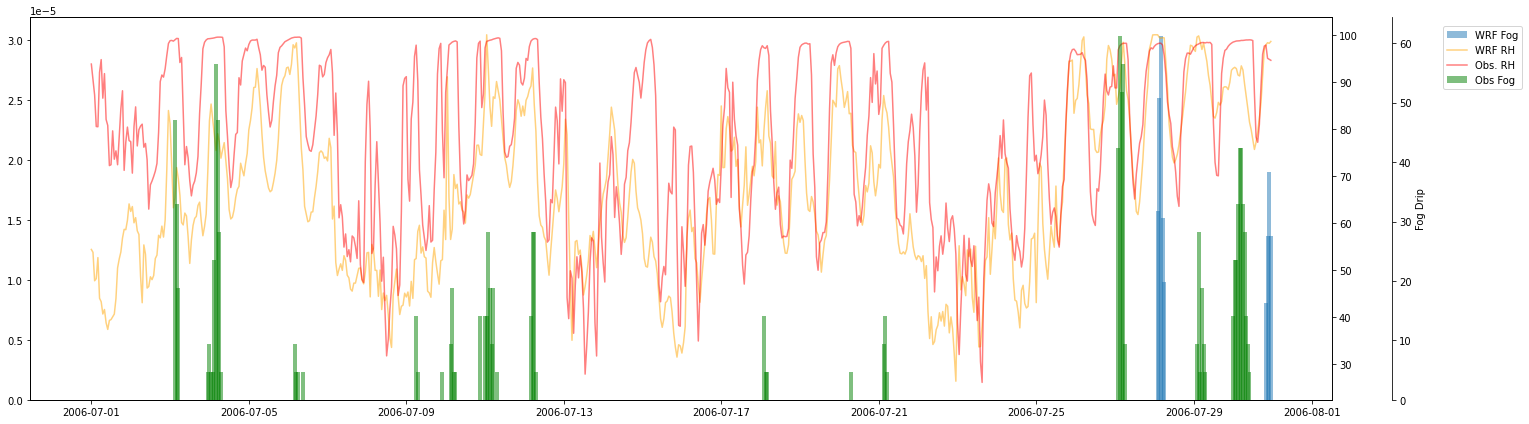

In [8]:
#### Chart prototype ####

## Create subsets of data
daterange = [f'2006-07-01', f'2006-7-30']
site='SAUC'
year = daterange[0].split('-')[0]
wdf = wsauc[daterange[0]:daterange[1]]
odf = osauc[daterange[0]:daterange[1]]

bar_width = 0.1

## Make Plots
# WRF Fog
fig, ax = plt.subplots(1, 1, figsize=(20, 6))
ax.bar(wdf.index, wdf['DFGDP'], label='WRF Fog', width=bar_width, alpha=0.5)

# WRF/Obs RH
ax2 = ax.twinx()
ax2.plot(wdf.index, wdf['RH'], color='orange', alpha=0.5, label='WRF RH')
ax2.plot(odf.index, odf['relative humidity (%)'], color='red', alpha=0.5, label='Obs. RH')

# Obs Fog
ax3 = ax.twinx()
ax3.spines['right'].set_position(('outward', 60))
ax3.bar(odf.index, odf['fog drip'], label='Obs Fog', color='green', width=bar_width, alpha=0.5)
ax3.set_ylabel('Fog Drip')


fig.legend(loc='upper right', bbox_to_anchor=(1.15, 0.99), bbox_transform=ax.transAxes)


#ax[1].bar(odf_df.index, odf_df['fog drip'])
#ax[1].set(title=f'{site} Observational {year}')

plt.tight_layout()
plt.show()

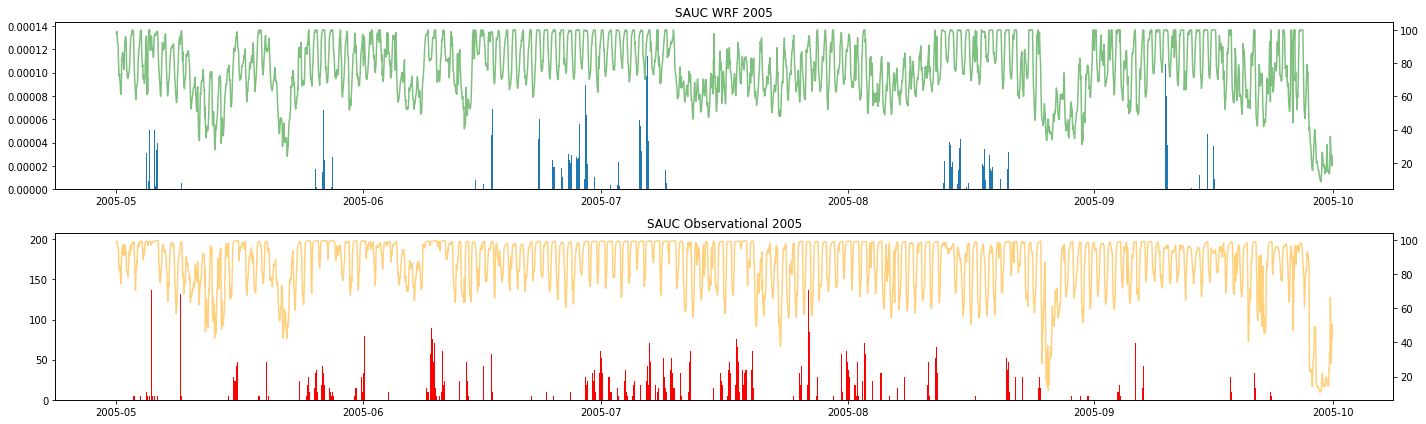

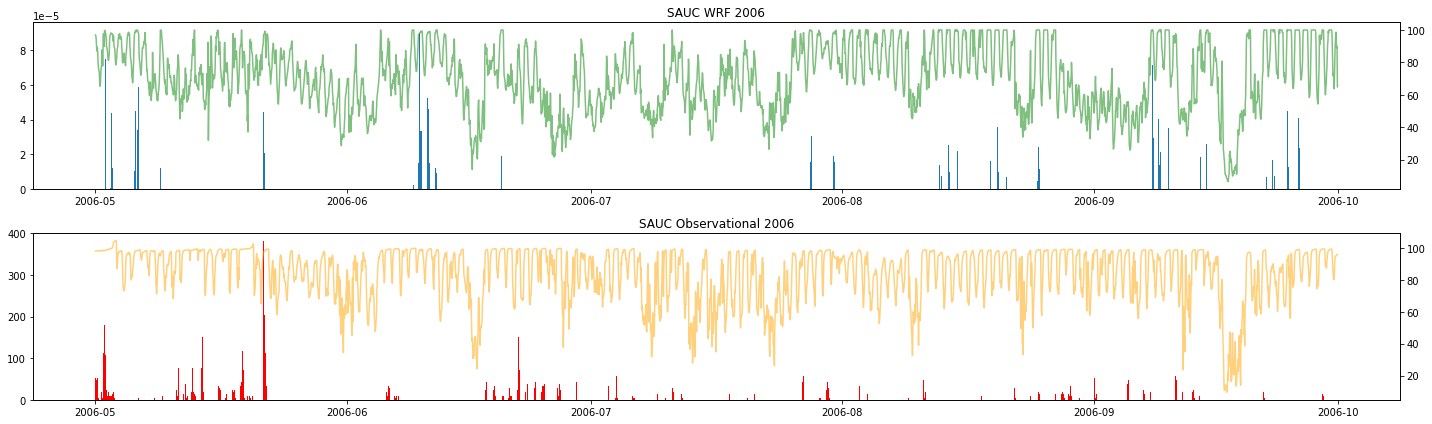

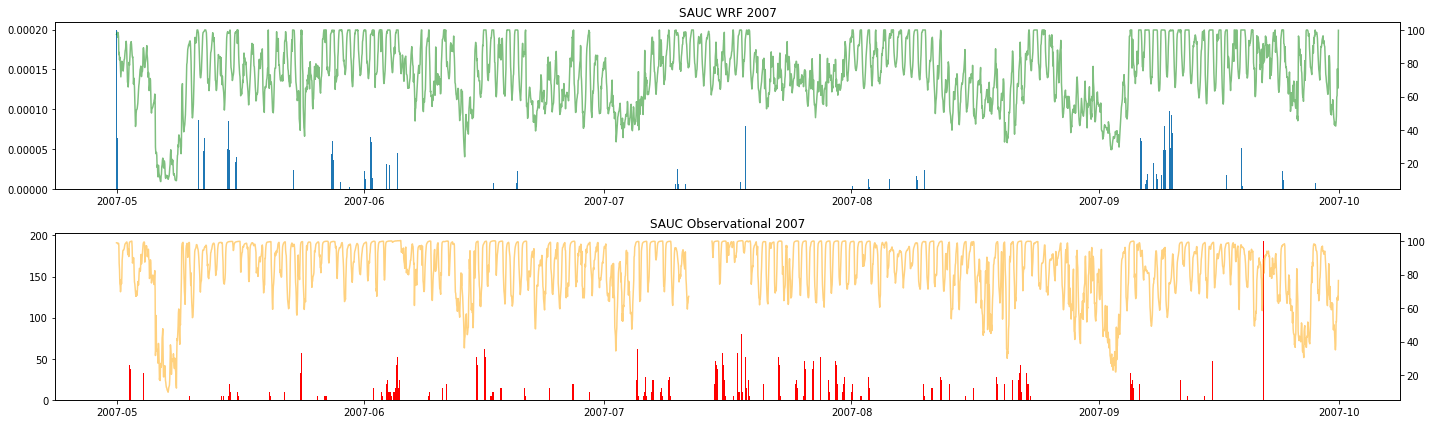

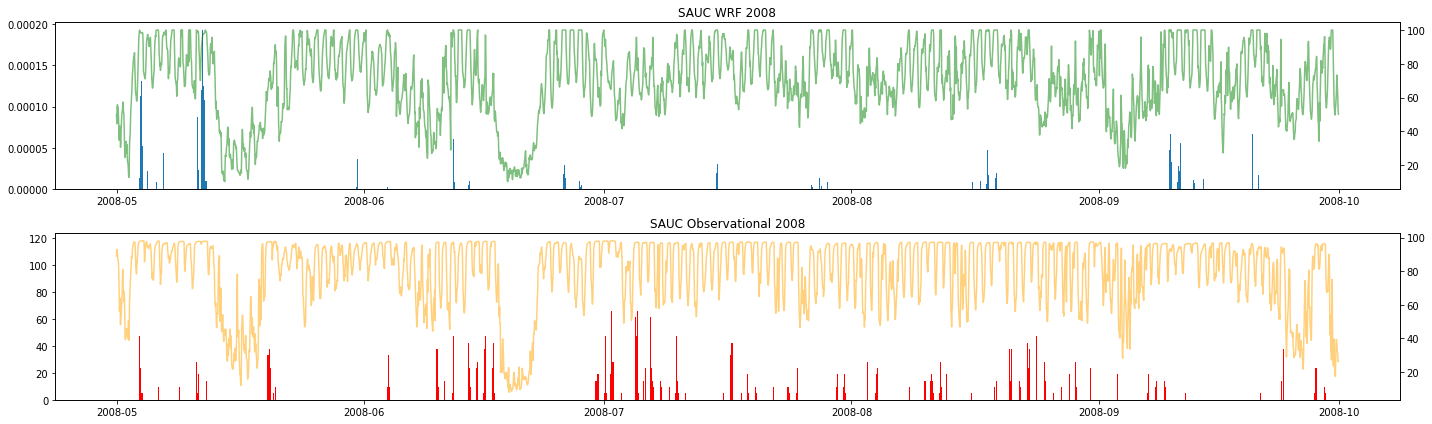

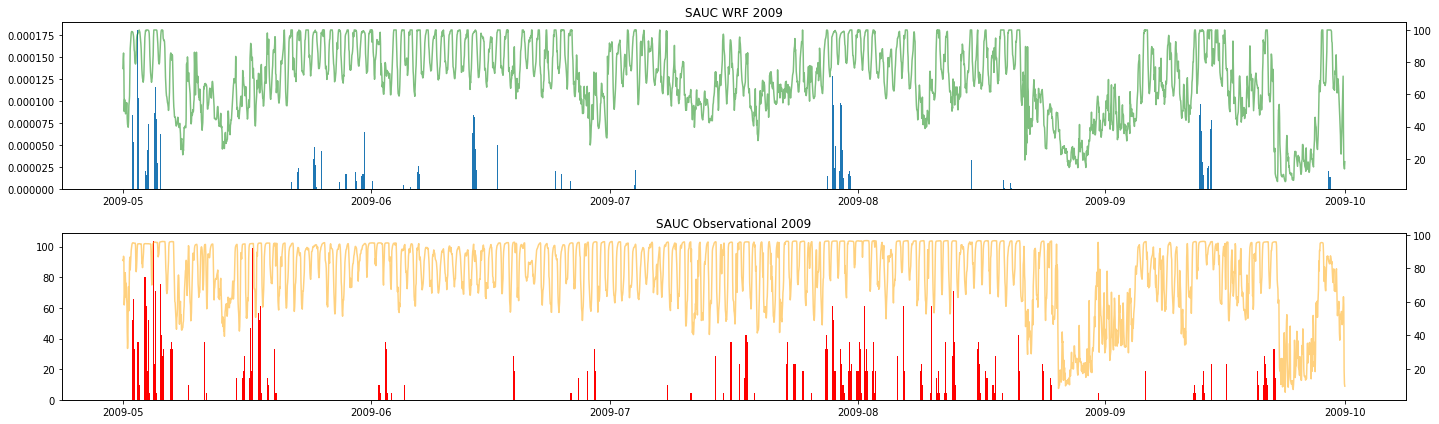

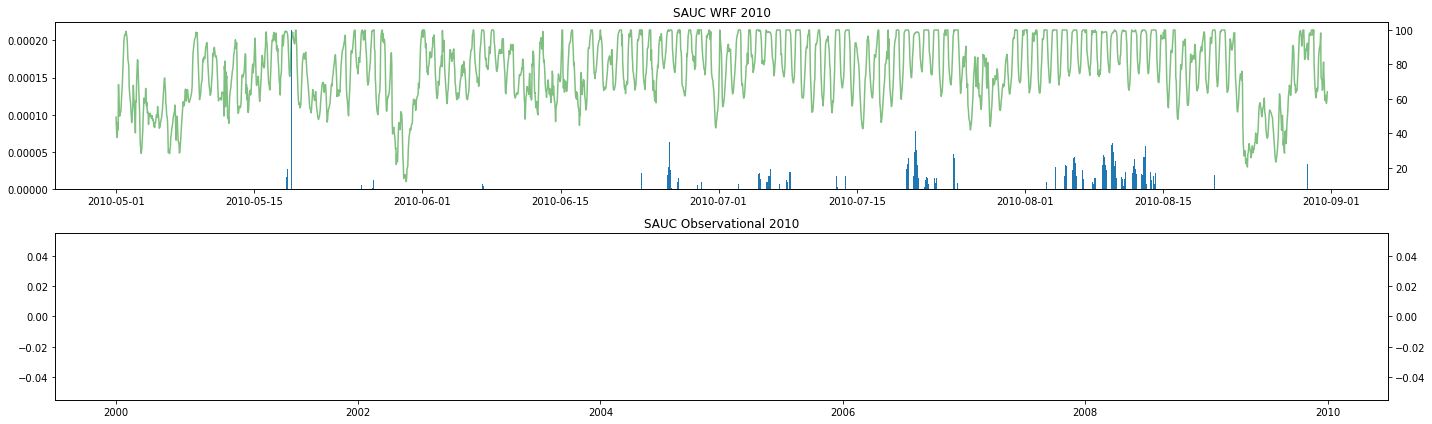

In [9]:
#### SAUC WRF vs. Observational ####
years = list(range(2005, 2011))
for year in years: 
    daterange = [f'{year}-05-01', f'{year}-09-30']
    plot_summer_comp(wsauc, osauc, daterange, 'SAUC')

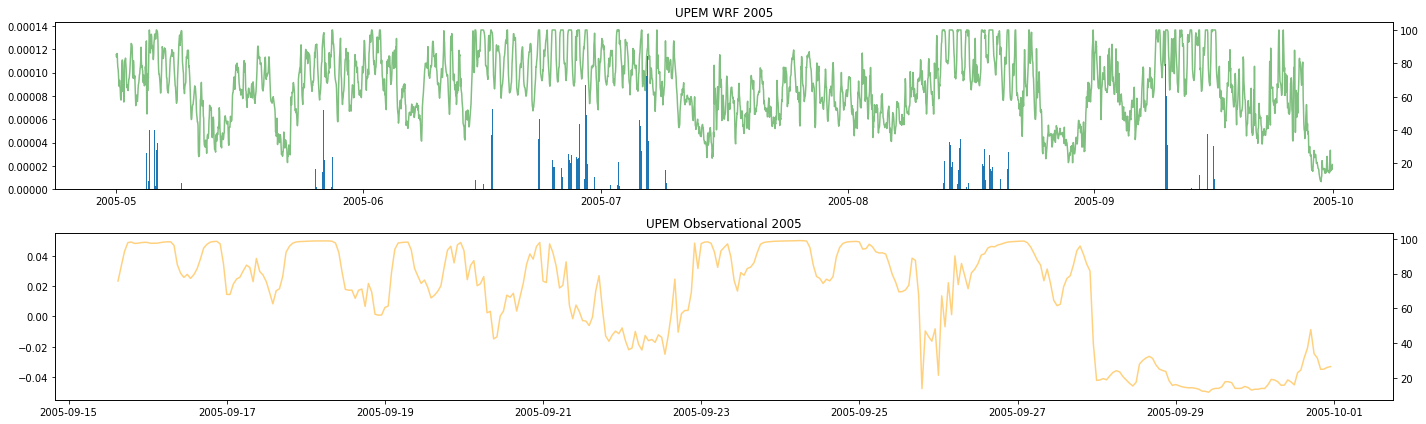

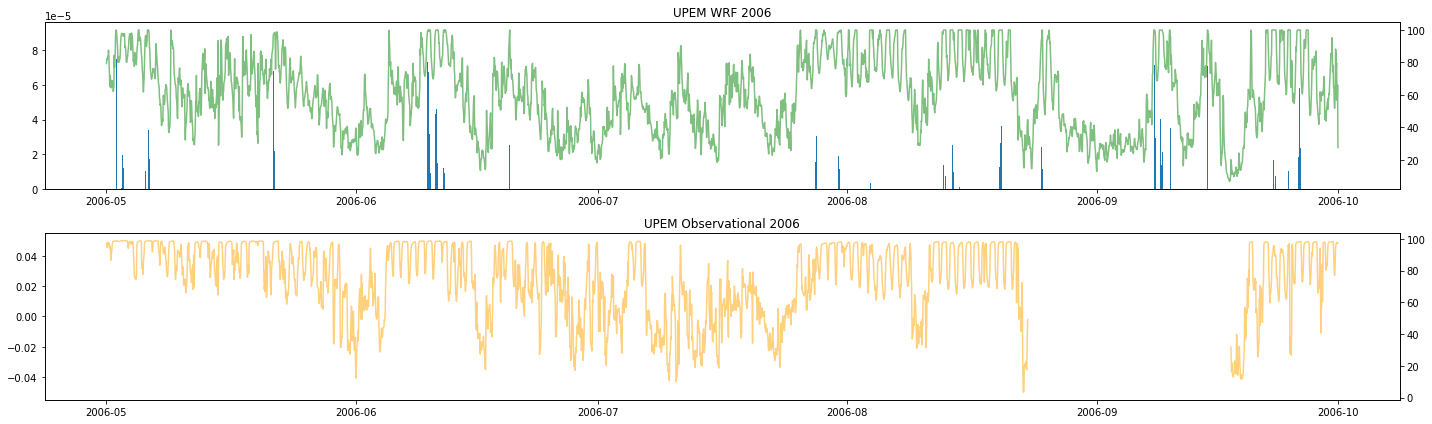

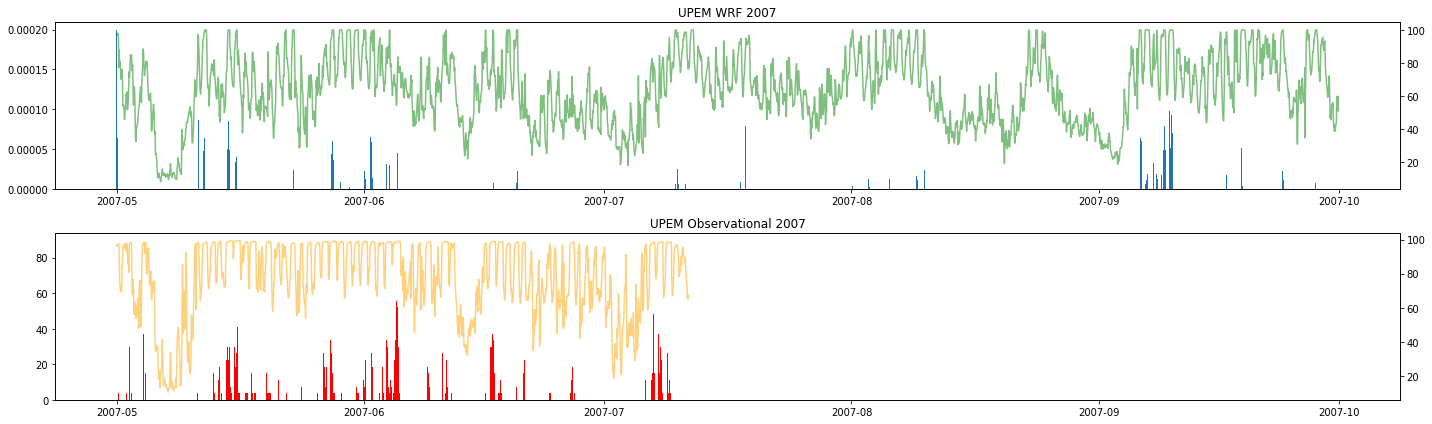

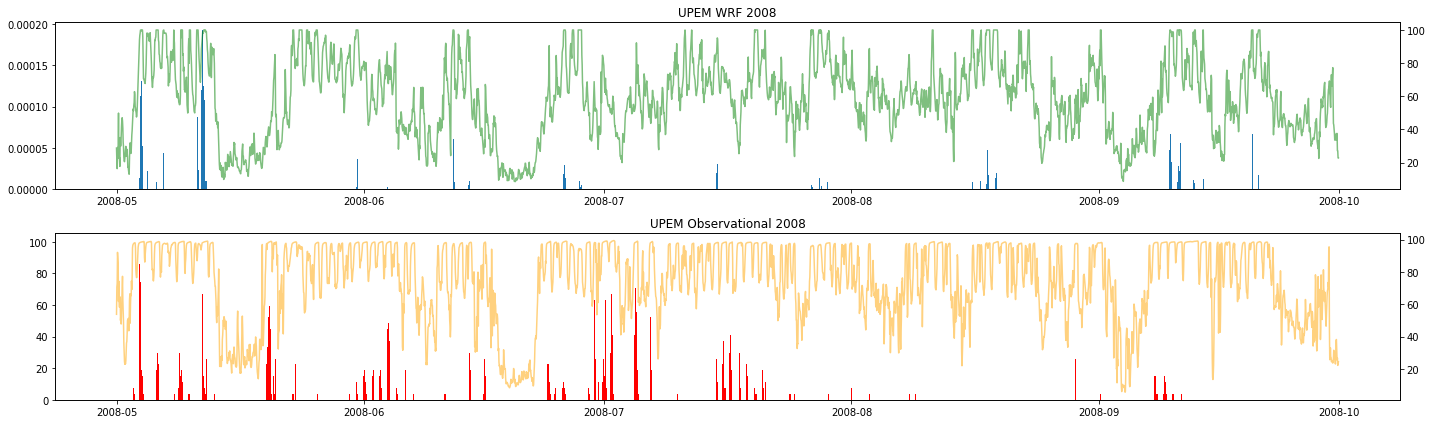

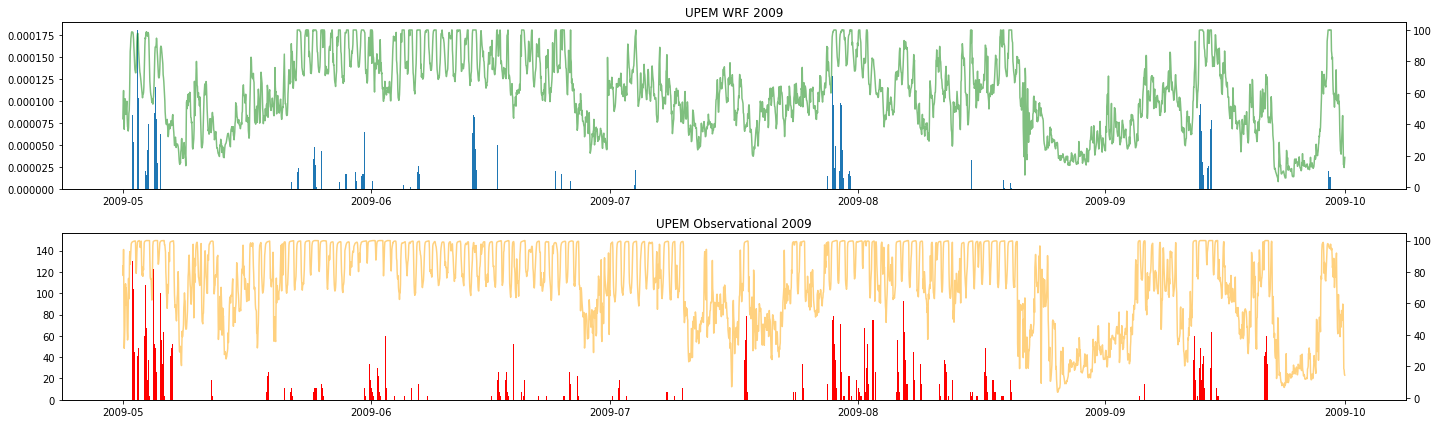

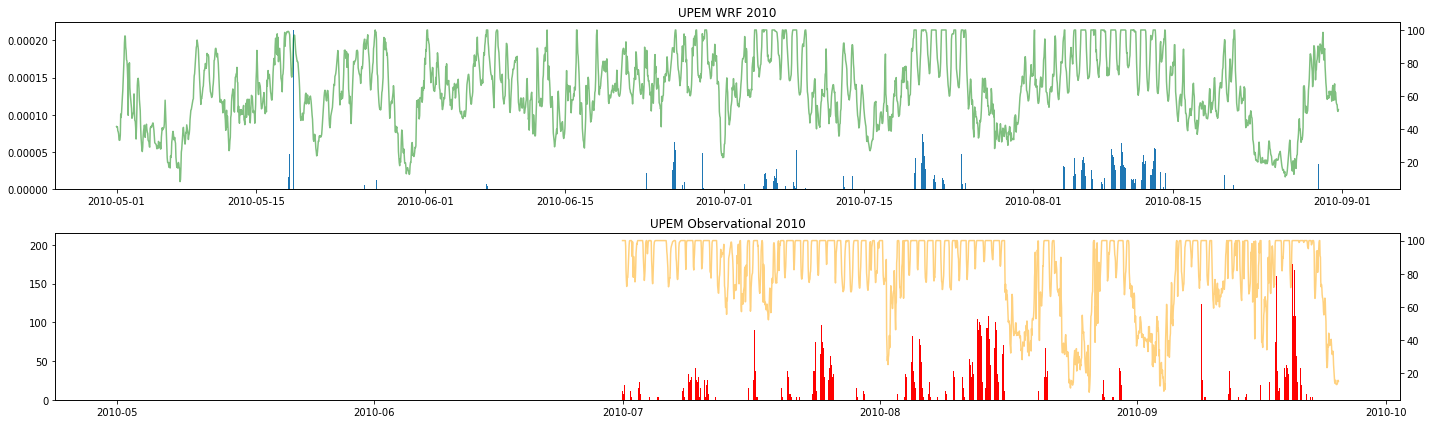

In [10]:
#### UPEM WRF vs. Observational ####
years = list(range(2005, 2011))
for year in years: 
    daterange = [f'{year}-05-01', f'{year}-09-30']
    plot_summer_comp(wupem, oupem, daterange, 'UPEM')

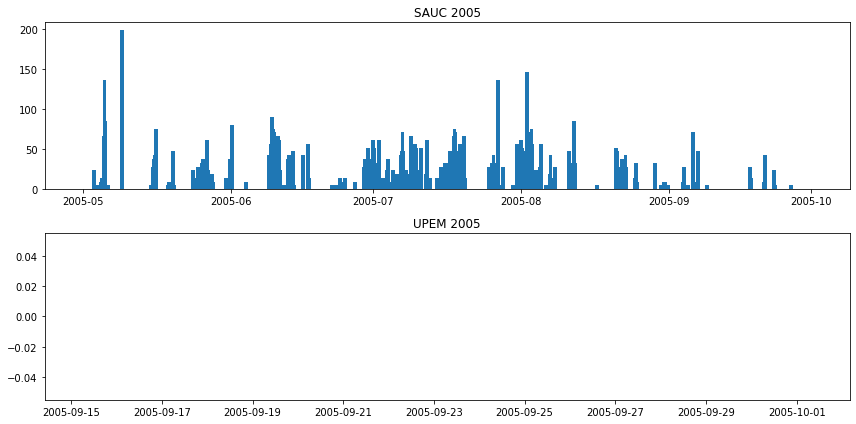

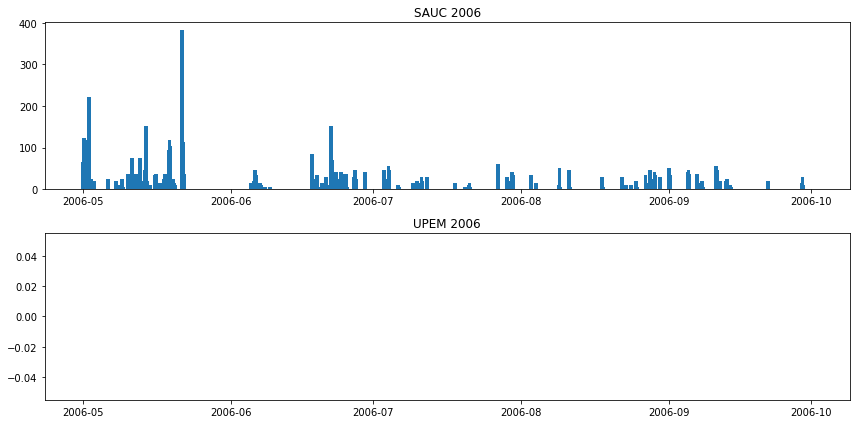

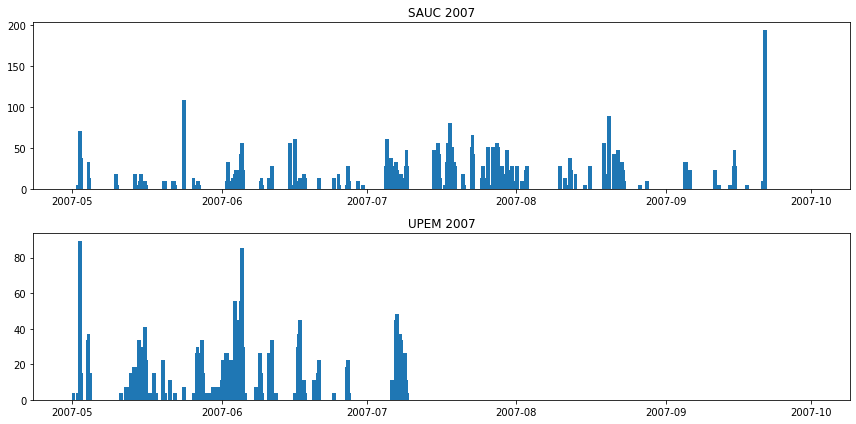

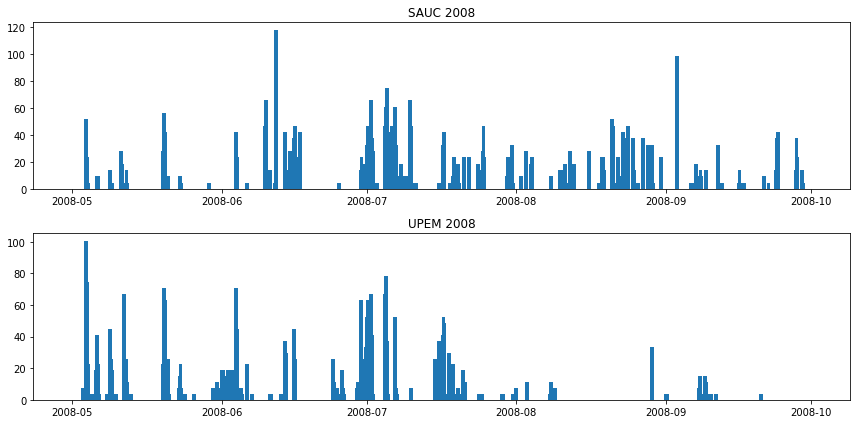

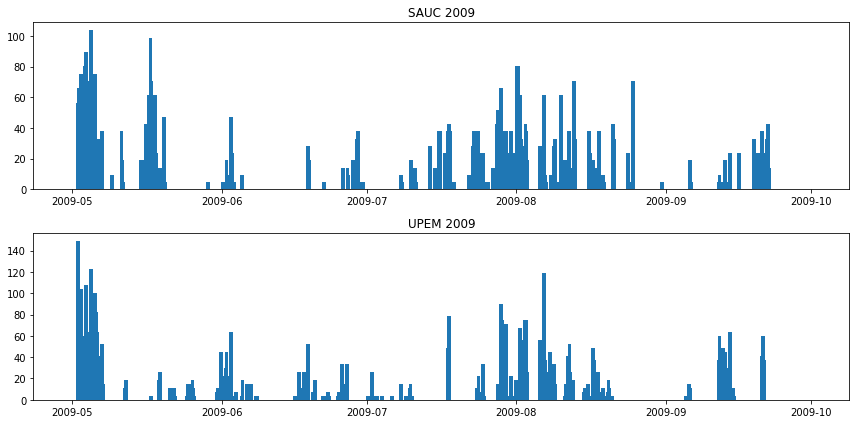

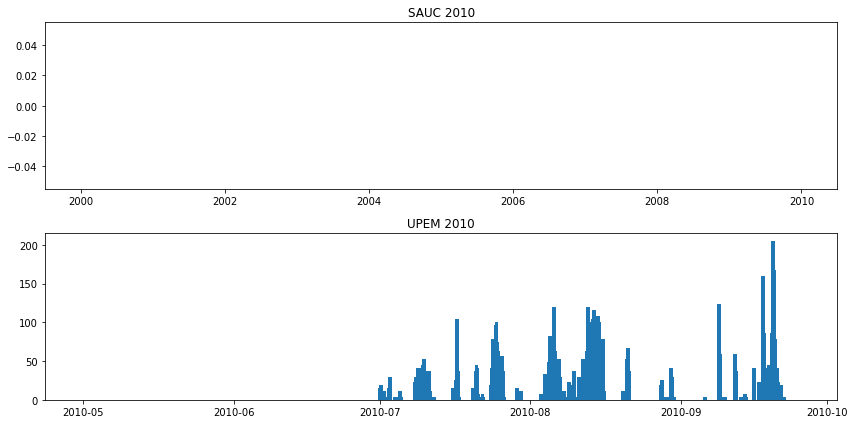

In [11]:
# Compare UPEM/SAUC observational data
def plot_obs_compare(sauc_df, upem_df, daterange):
    ## Create subsets of data
    year = daterange[0].split('-')[0]
    sauc_df = sauc_df[daterange[0]:daterange[1]]
    upem_df = upem_df[daterange[0]:daterange[1]]

    ## Make Plots
    fig, ax = plt.subplots(2, 1, figsize=(12, 6))
    ax[0].bar(sauc_df.index, sauc_df['fog drip'])
    ax[1].bar(upem_df.index, upem_df['fog drip'])

    ax[0].set(title=f'SAUC {year}')
    ax[1].set(title=f'UPEM {year}')

    plt.tight_layout()
    plt.show()
    
years = list(range(2005, 2011))
for year in years: 
    daterange = [f'{year}-05-01', f'{year}-09-30']
    plot_obs_compare(osauc, oupem, daterange)

# Statistics

## SAUC 

In [12]:
#### Merge observational/model data ####
sauc_merged = wsauc.join(osauc, how='inner')
sauc_merged.columns = ['wrf fog', 'obs fog']
sauc_merged.head(3)

#### Make boolean to indicate when wrf/obs > 0 ####
sauc_merged['match'] = np.logical_and(sauc_merged['wrf fog'] != 0, sauc_merged['obs fog'] != 0)

#### Calculate percent of match ####
match_count = sauc_merged.loc[sauc_merged['match'] == True].shape[0]
nonzero_obs_count = sauc_merged.loc[sauc_merged['obs fog'] > 0].shape[0]
match_perc = match_count / nonzero_obs_count * 100
print(f'{round(match_perc, 3)}%')


ValueError: Length mismatch: Expected axis has 16 elements, new values have 2 elements

## UPEM

In [13]:
#### Merge observational/model data ####
upem_merged = upem_dfgdp.join(oupem, how='inner')
upem_merged.columns = ['wrf fog', 'obs fog']
upem_merged.head(3)

#### Make boolean to indicate when wrf/obs > 0 ####
upem_merged['match'] = np.logical_and(upem_merged['wrf fog'] != 0, upem_merged['obs fog'] != 0)

#### Calculate percent of match ####
match_count = upem_merged.loc[upem_merged['match'] == True].shape[0]
match_perc = match_count / upem_merged.shape[0] * 100
nonzero_obs_count = upem_merged.loc[upem_merged['obs fog'] > 0].shape[0]
match_perc = match_count / nonzero_obs_count * 100
print(f'{round(match_perc, 3)}%')


NameError: name 'upem_dfgdp' is not defined

In [ ]:
data_dir = '~/data/wrf_extracted'
fname = 'wrf_sauc_2003-2010.pkl'
df = pd.read_pickle(os.path.join(data_dir, fname))
df.columns = ['DFGDP', 'T2', 'Q2', 'PSFC', 'LWUPB', 'LWDNB', 'SWUPB', 'SWDNB']
df.to_pickle(os.path.join(data_dir, fname))

In [ ]:
data_dir = '~/data/wrf_extracted'
fname = 'wrf_upem_2003-2010.pkl'
df = pd.read_pickle(os.path.join(data_dir, fname))
df.head()

# WRF Derived Fog Variable

In [14]:
wsauc = wsauc.loc[wsauc['LWDNB'] > 0]

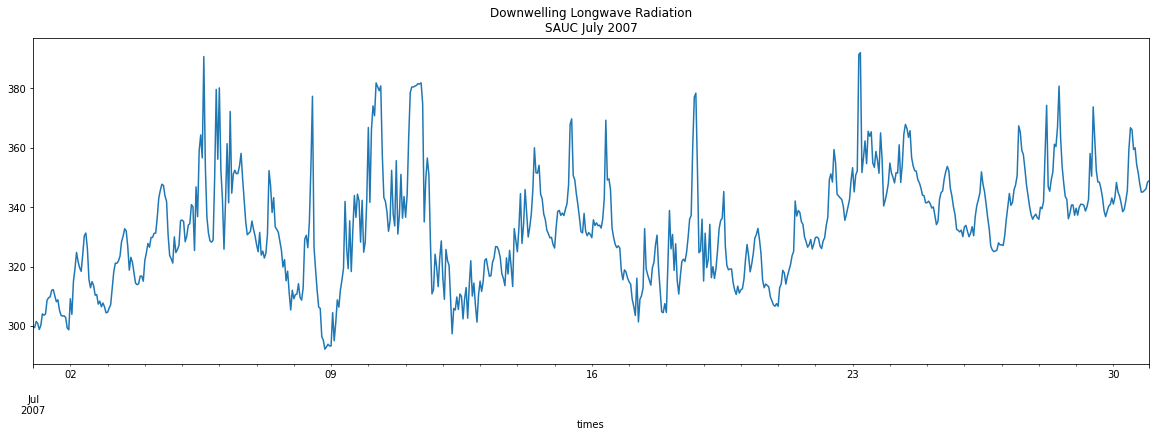

In [15]:
#### Check LWDNB distribution ####
df = wsauc.loc[wsauc['LWDNB'] > 0]
df = df['2007-07-01':'2007-07-30']
df['LWDNB'].plot(figsize=(20,6))
plt.title(f'Downwelling Longwave Radiation\nSAUC July 2007')
plt.show()

In [16]:
#### Create fog variable based off LWNDB ####
wsauc['pred_fog'] = wsauc['LWDNB'].apply(lambda x: 1 if x >= 350 else 0)

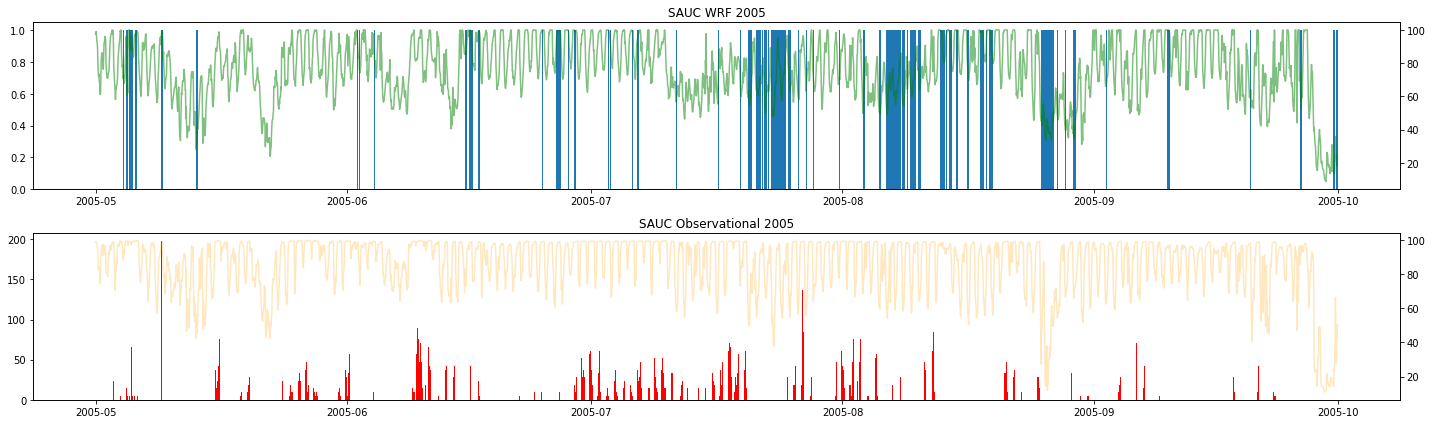

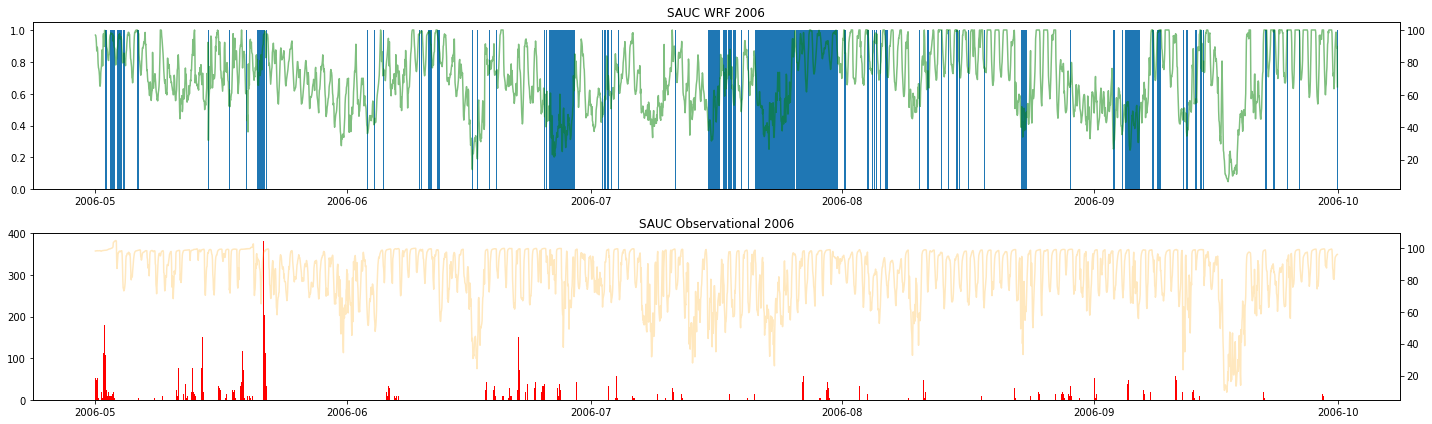

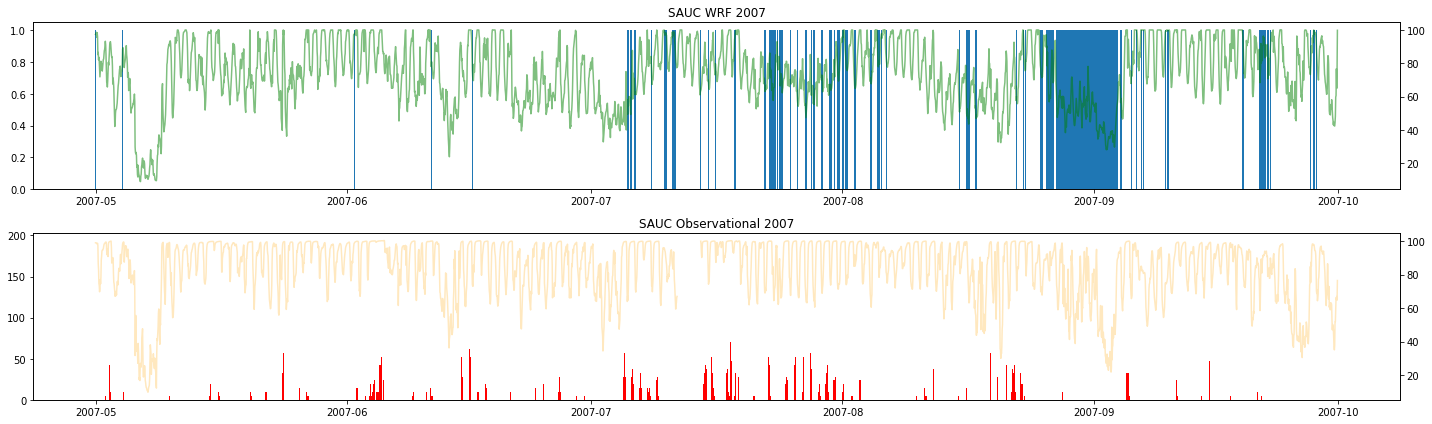

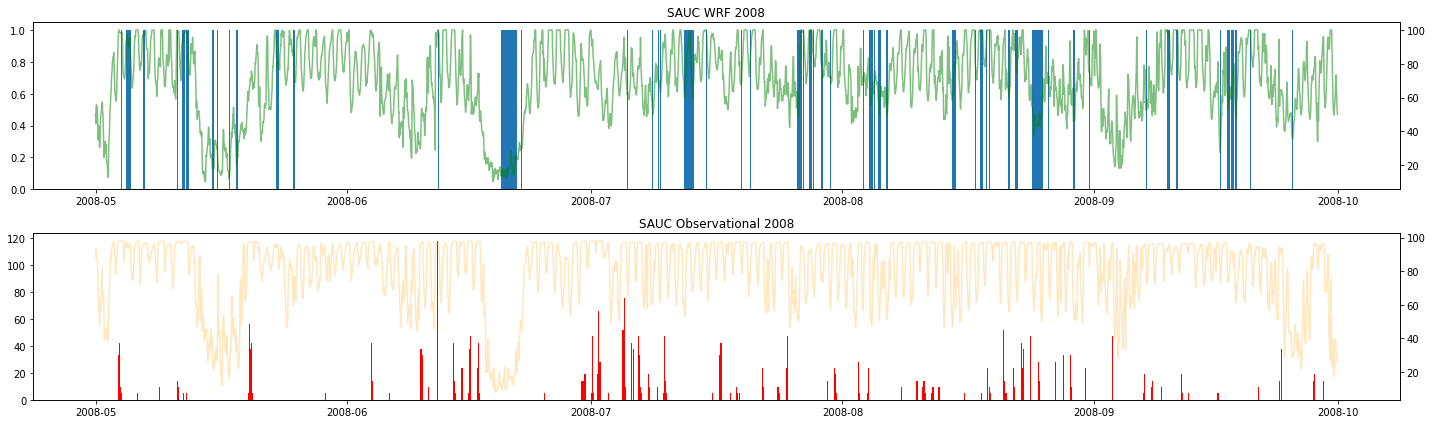

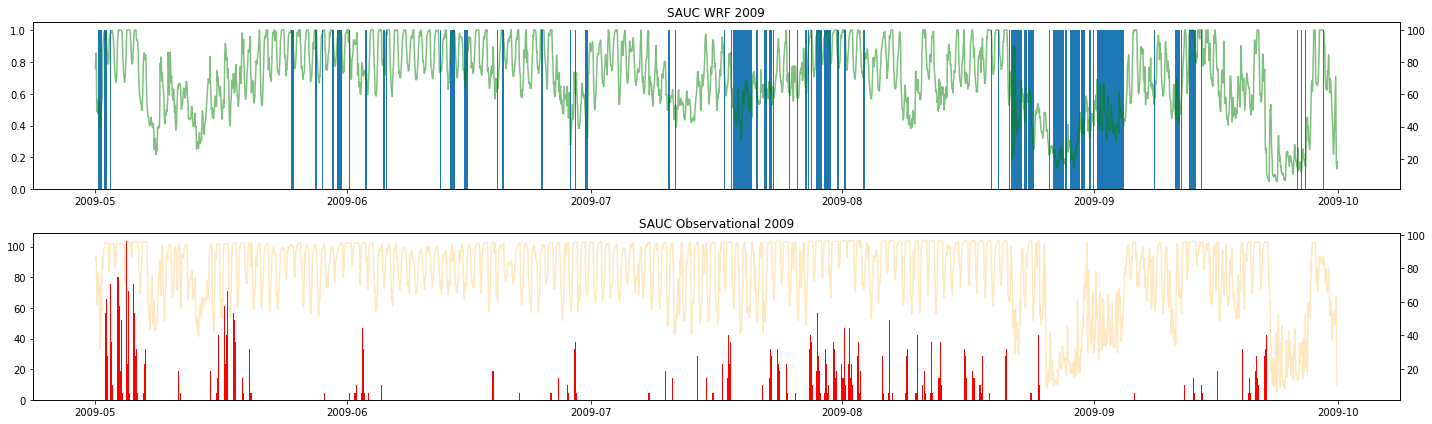

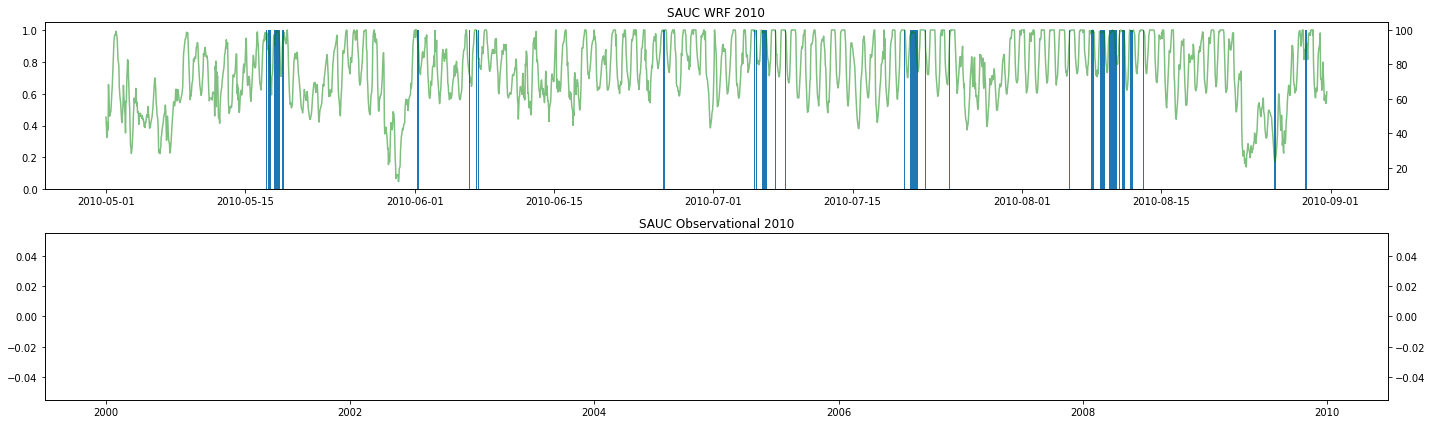

In [22]:
#### SAUC WRF vs. Observational ####
years = list(range(2005, 2011))
for year in years: 
    daterange = [f'{year}-05-01', f'{year}-09-30']
    plot_summer_comp(wsauc, osauc, daterange, 'SAUC')

In [21]:
# Compare summer fog data
def plot_summer_comp(wrf_df, obs_df, daterange, site):
    ## Create subsets of data
    year = daterange[0].split('-')[0]
    wrf_df = wrf_df[daterange[0]:daterange[1]]
    obs_df = obs_df[daterange[0]:daterange[1]]
    
    bar_width = 0.05

    ## Make Plots
    fig, ax = plt.subplots(2, 1, figsize=(20, 6))
    ax[0].bar(wrf_df.index, wrf_df['pred_fog'], label='Fog', width=bar_width)
    wrh_ax = ax[0].twinx()
    wrh_ax.plot(wrf_df.index, wrf_df['RH'], color='green', alpha=0.5, label='RH')
    
    ax[1].bar(obs_df.index, obs_df['fog drip'], color='red', label='Fog', width=bar_width)
    orh_ax = ax[1].twinx()
    orh_ax.plot(obs_df.index, obs_df['relative humidity (%)'], color='orange', alpha=0.25, label='RH')

    
    ax[0].set(title=f'{site} WRF {year}')
    ax[1].set(title=f'{site} Observational {year}')

    plt.tight_layout()
    plt.show()
    
#years = list(range(2005, 2011))
#for year in years: 
#    daterange = [f'{year}-05-01', f'{year}-09-30']
#    plot_summer_comp(wsauc, osauc, daterange, 'SAUC')